<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/PCA_to_Speed_up_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
# Get data
df = pd.read_csv('/content/wisconsinBreastCancer.csv', index_col = 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Drop unnecessary column
df.drop(columns = 'Unnamed: 32', inplace = True)
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']

In [ ]:
X.shape

(569, 30)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [ ]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

# Increasing Components Increases the Cumulative Variance Explained

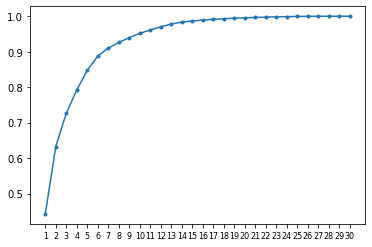

In [ ]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,31), fontsize=8);

# Visualize Scree Plot

Text(0, 0.5, 'Proportion of Explained Variance')

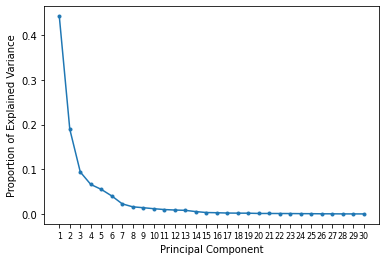

In [ ]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 31), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 31), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

# Elbow Method

In [ ]:
# PCA with 7 components
pca7 = PCA(n_components=7)

#Specifying the Explained Variance


In [ ]:
# PCA with 85% explained variance
pca85 = PCA(n_components=.85)

# Example of PCA with Supervised Learning


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

In [ ]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9812206572769953
Testing accuracy: 0.972027972027972
